In [2]:
import matplotlib.pyplot as pp
import pandas as pd
import seaborn
import itertools
%matplotlib inline

In [3]:
level = ['simple','complex','balanced']
action = ['read','write','update','delete']

table_titles = [ x + " "+ y  for x in level for y in action]
print table_titles

['simple read', 'simple write', 'simple update', 'simple delete', 'complex read', 'complex write', 'complex update', 'complex delete', 'balanced read', 'balanced write', 'balanced update', 'balanced delete']


In [4]:
result_table = pd.read_csv('result.csv',names=['name']+table_titles)
result_table

,name,simple read,simple write,simple update,simple delete,complex read,complex write,complex update,complex delete,balanced read,balanced write,balanced update,balanced delete
0,ORMLite,151,666,122,105,445,3836,857,811,1563,3426,724,728
1,SugarORM,245,842,252,152,1402,4129,1467,1003,2204,4397,1702,1197
2,DBFlow,97,757,459,186,360,3534,3124,1044,1129,4653,5204,1268
3,Freezer,248,5430,240,4797,1337,78982,2221,22104,3255,134942,1887,29515
4,Requery,87,1501,147,129,461,8057,861,802,1368,8002,886,763
5,Realm,151,29,1079,723,698,688,19666,9180,1522,210,21129,10006
6,GreenDAO,81,1238,117,97,357,5552,455,274,598,5905,504,315
7,ActiveAndroid,3123,930,2293,2423,14671,4165,15958,13023,17213,4653,19303,14642
8,Sprinkles,5766,1050,6364,605,25978,4334,65579,2428,27774,4526,37705,2519
9,Room,131,699,170,109,562,3201,717,403,1330,3532,790,507


In [5]:
colors=['#F44336','#E91E63','#9C27B0','#673AB7','#3F51B5','#2196F3','#00BCD4','#009688','#4CAF50','#8BC34A','#CDDC39','#FFEB3B','#FFC107','#FF9800','#FF5722','#795548','#607D8B']

rows = len(result_table.index)

def benchmark_plot(title, data_titles, maximum=0):
    local_max = maximum
    pp.figure(figsize=(12,2.5))
    pp.title(title)
    for i in range(rows):
        row = result_table.iloc[i]
        data = [row[k] for k in data_titles]
        if maximum == 0 and local_max<max(data):
            local_max = max(data)
        pp.bar([len(result_table.index)*j+i for j in range(4)],data, label=row['name'], color=colors[i])

    pp.xticks([len(result_table.index)*j+4 for j in range(4)],[k.split()[1] for k in data_titles])
    pp.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    maximum = local_max
    pp.axis((0,rows*4,0,maximum))
    #pp.xlabel('libs')
    pp.ylabel('ms')

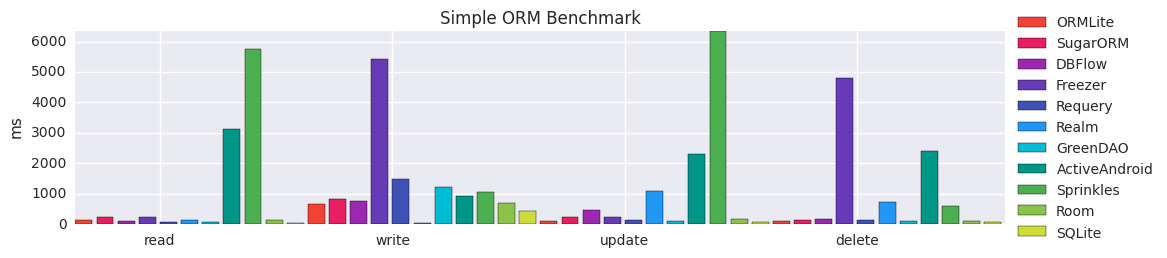

In [6]:
benchmark_plot('Simple ORM Benchmark',table_titles[:4])

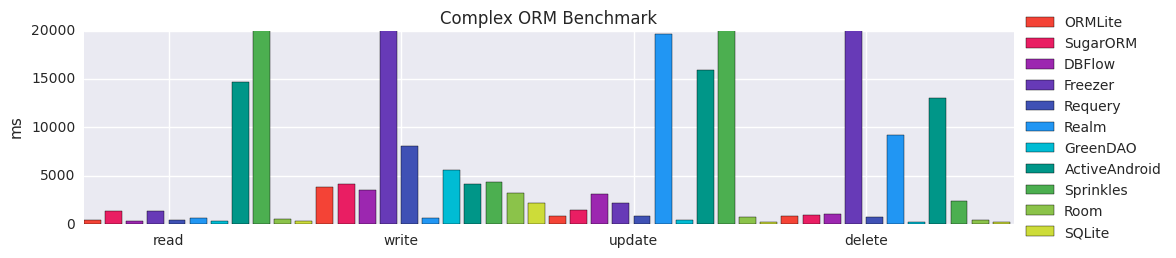

In [7]:
benchmark_plot('Complex ORM Benchmark',table_titles[4:8],20000)

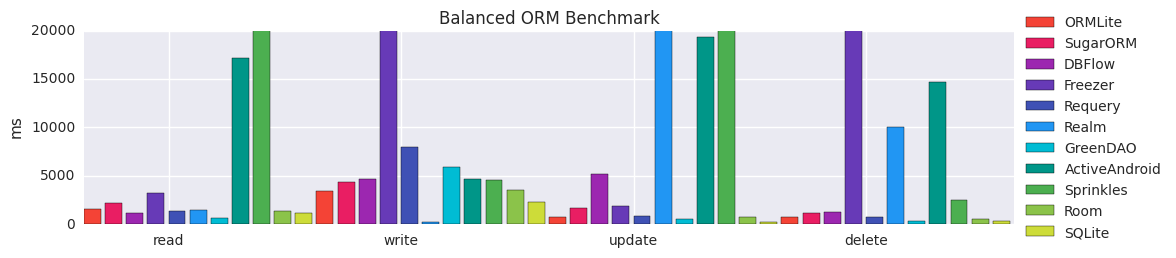

In [8]:
benchmark_plot('Balanced ORM Benchmark',table_titles[8:12],20000)

In [9]:
def details_plot(index, color='#607D8B', value_func = max):
    pp.figure(figsize=(12,2.5))
    row = result_table.iloc[:,[0,index+1]]
    
    rows = len(result_table.index)
    pp.axis((0,rows,0,value_func(row[table_titles[index]])))
    
    pp.title(table_titles[index])
    pp.bar([j for j in range(len(row))], row[table_titles[index]], color = color)
    pp.xticks([i+0.4 for i in range(len(row))],[k for k in row['name']])
    pp.ylabel('ms')

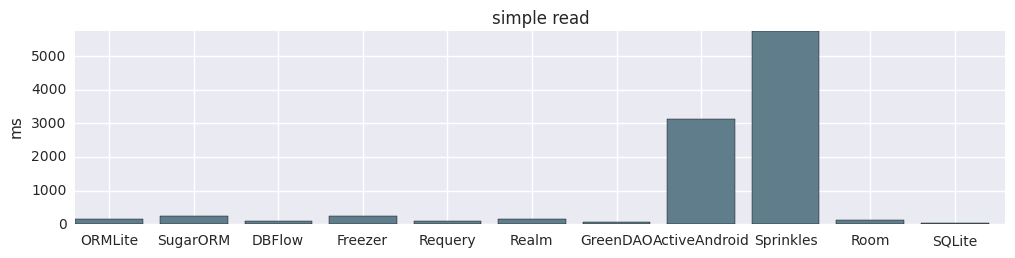

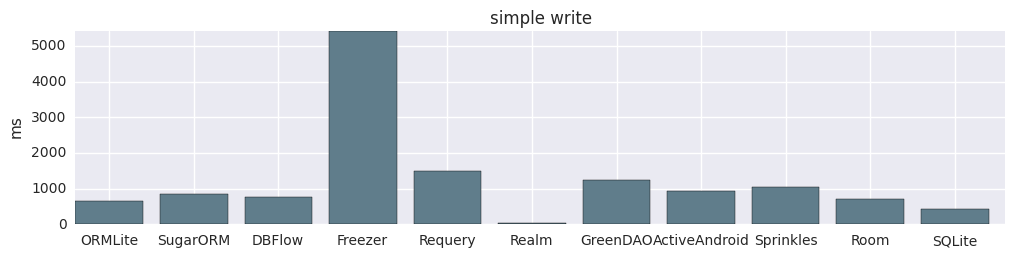

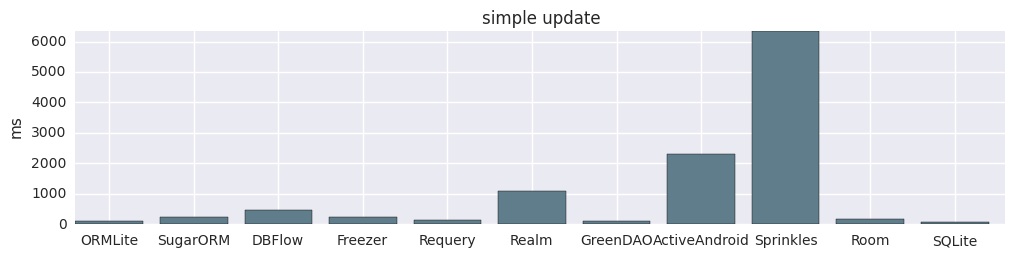

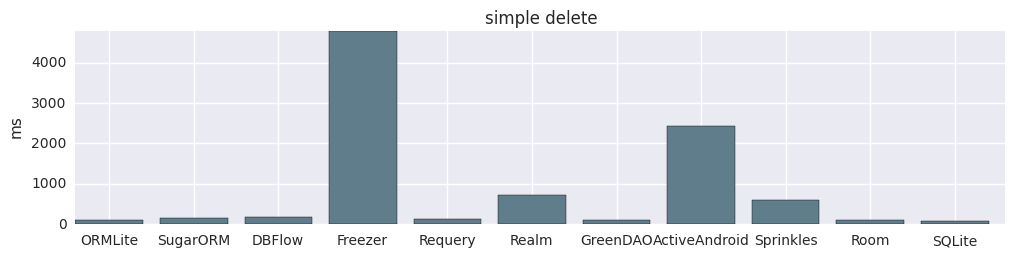

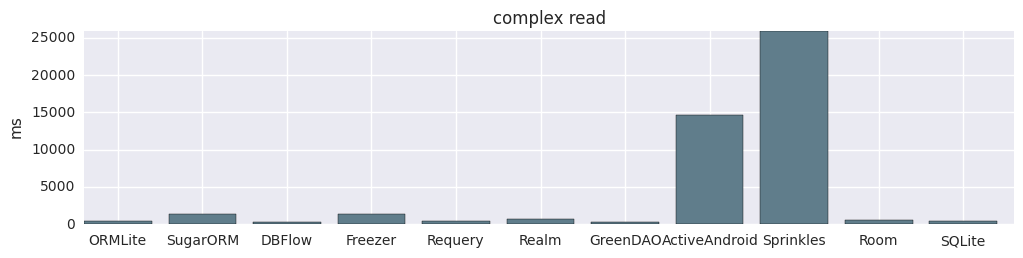

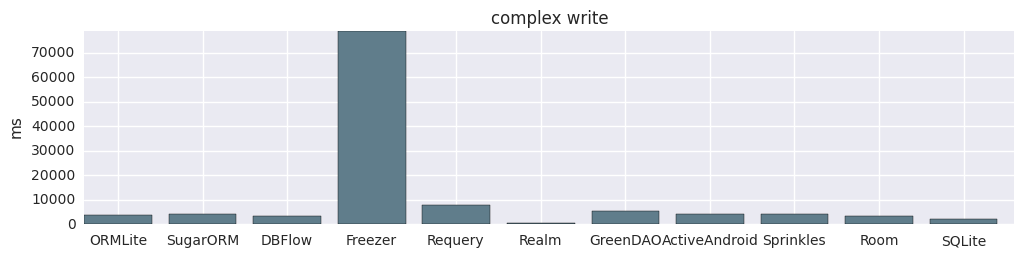

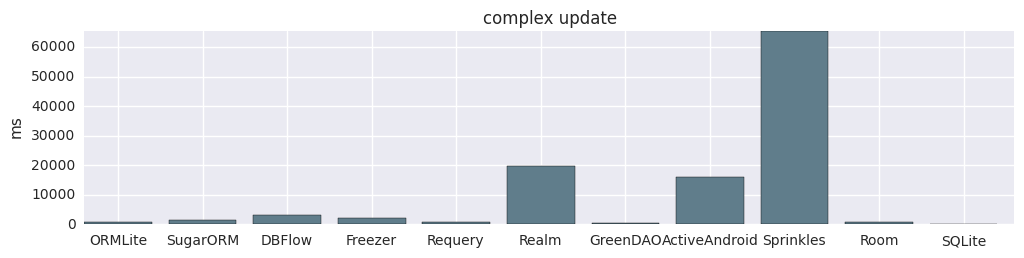

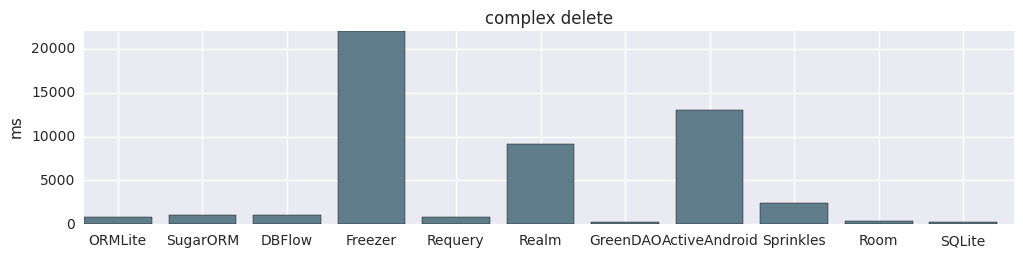

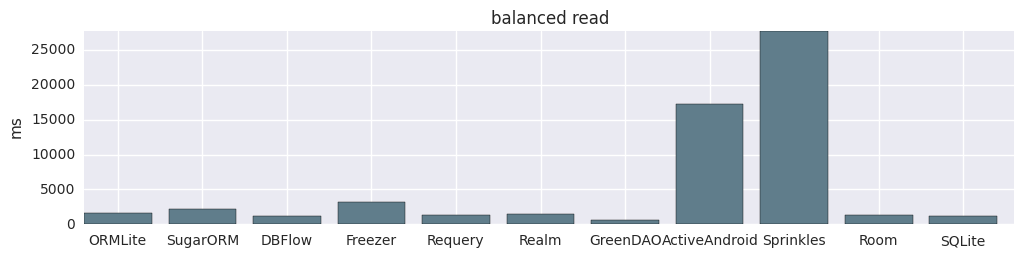

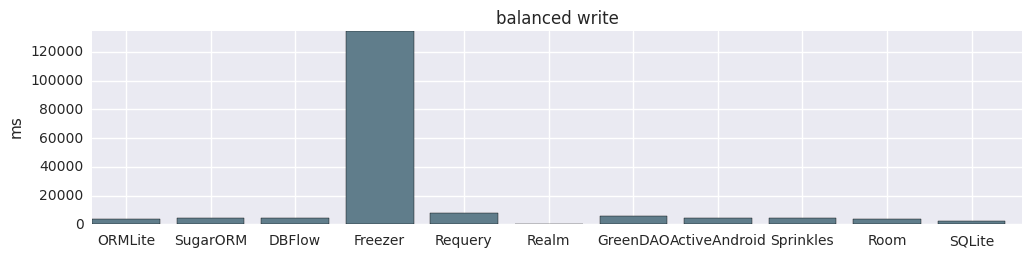

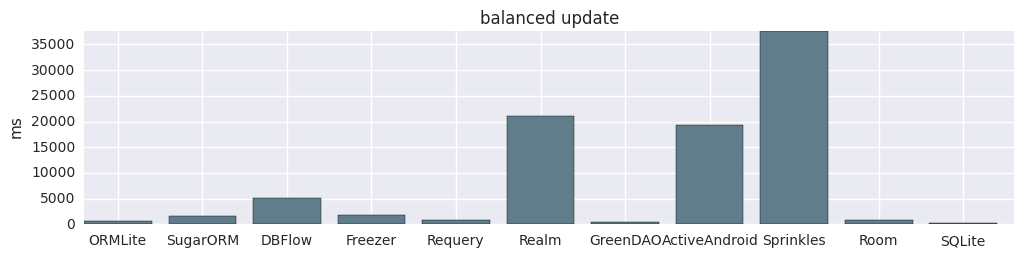

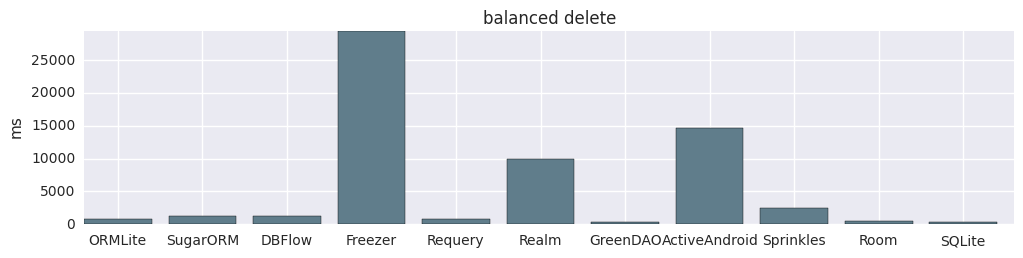

In [16]:
for i in range(len(result_table.index)+1):
    details_plot(i)

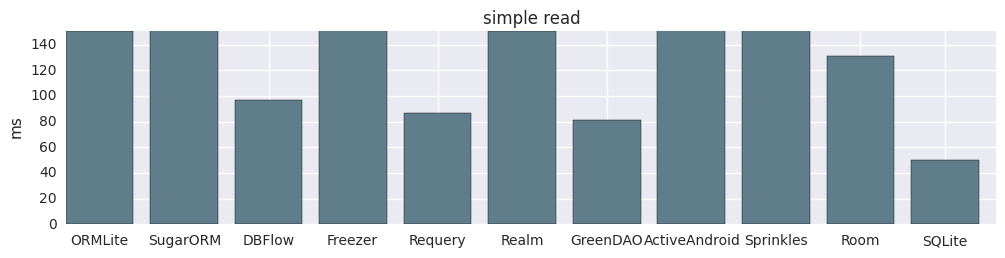

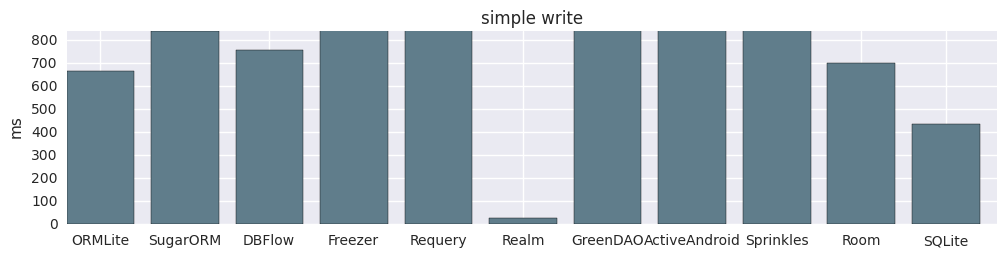

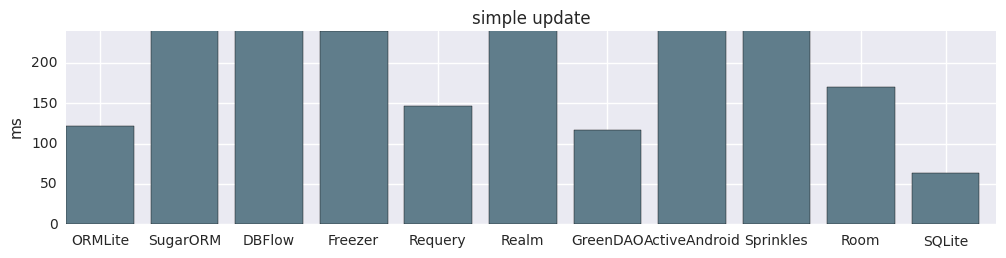

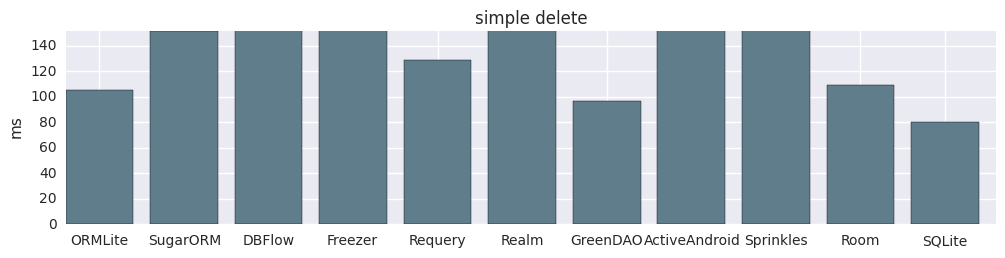

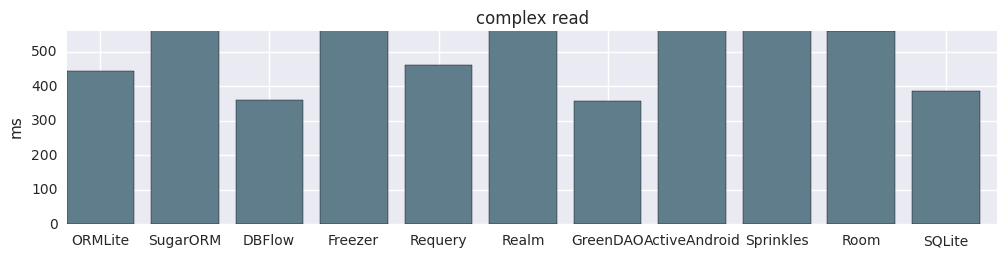

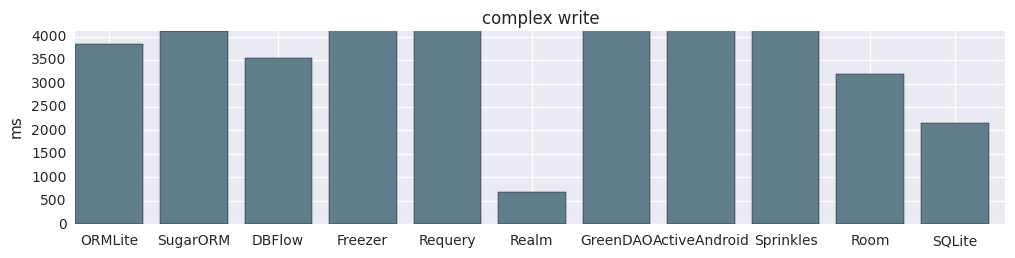

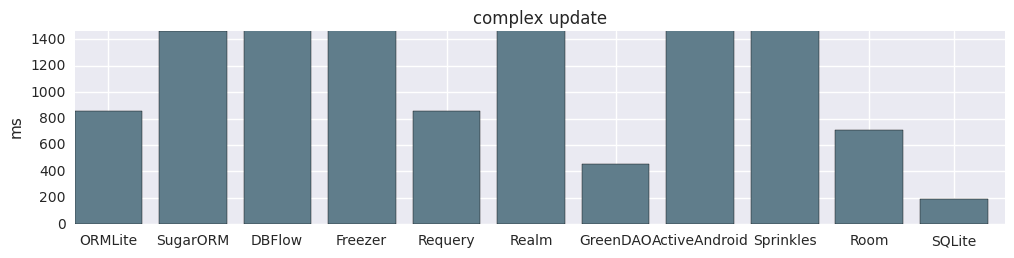

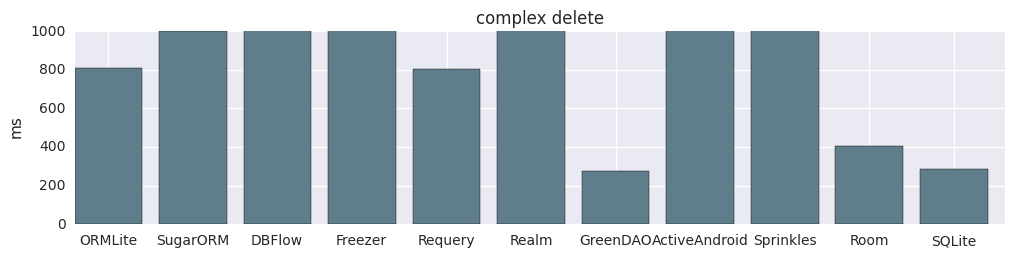

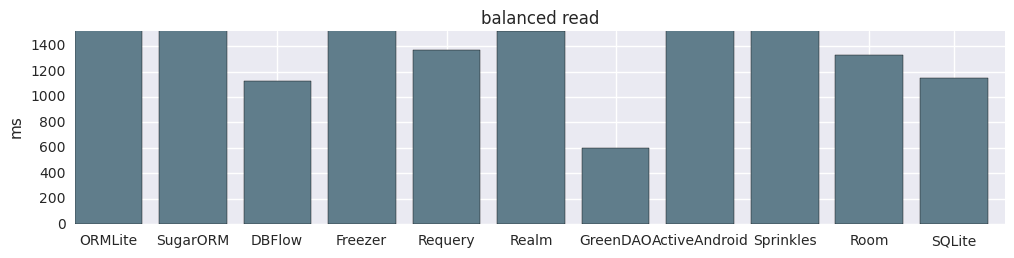

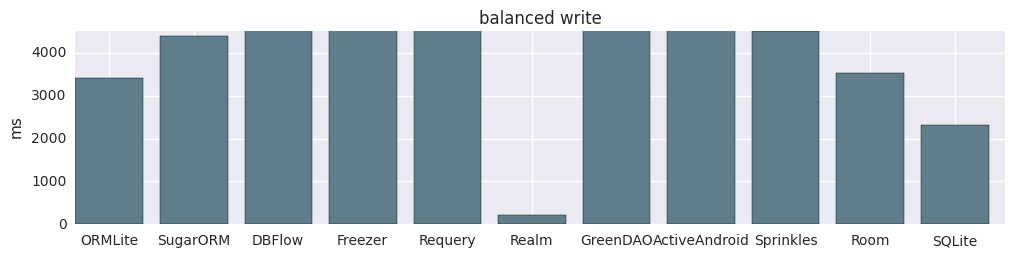

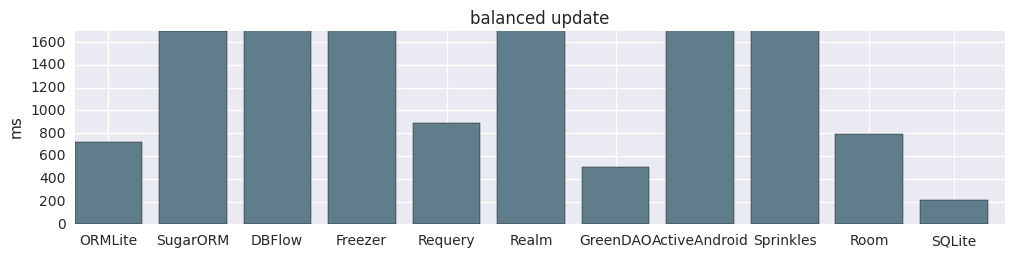

In [11]:
import statistics
for i in range(len(result_table.index)+1):
    details_plot(i,value_func = statistics.median)

In [12]:
result_table.sort_values(table_titles[0]).iloc[:,[0,1]]

,name,simple read
10,SQLite,50
6,GreenDAO,81
4,Requery,87
2,DBFlow,97
9,Room,131
0,ORMLite,151
5,Realm,151
1,SugarORM,245
3,Freezer,248
7,ActiveAndroid,3123


In [13]:
result_table.sort_values(table_titles[1]).iloc[:,[0,2]]

,name,simple write
5,Realm,29
10,SQLite,436
0,ORMLite,666
9,Room,699
2,DBFlow,757
1,SugarORM,842
7,ActiveAndroid,930
8,Sprinkles,1050
6,GreenDAO,1238
4,Requery,1501


In [14]:
result_table.sort_values(table_titles[2]).iloc[:,[0,3]]

,name,simple update
10,SQLite,63
6,GreenDAO,117
0,ORMLite,122
4,Requery,147
9,Room,170
3,Freezer,240
1,SugarORM,252
2,DBFlow,459
5,Realm,1079
7,ActiveAndroid,2293


In [15]:
result_table.sort_values(table_titles[3]).iloc[:,[0,4]]

,name,simple delete
10,SQLite,80
6,GreenDAO,97
0,ORMLite,105
9,Room,109
4,Requery,129
1,SugarORM,152
2,DBFlow,186
8,Sprinkles,605
5,Realm,723
7,ActiveAndroid,2423
